In [115]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [116]:
df = pd.read_csv('crime.csv', delimiter= ',', header=0)

In [117]:
df.head(2)

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny-theft,Motor vehicle theft,Arson3
0,Adams Village,1861,0,0,NaN,0,0,0,12,2,10,0,0.0
1,Addison Town and Village,2577,3,0,NaN,0,0,3,24,3,20,1,0.0


In [118]:
df.shape

(348, 13)

In [119]:
#Check null
df.isna().sum()

City                                      0
Population                                0
Violent crime                             0
Murder and nonnegligent manslaughter      0
Rape (revised definition)1              348
Rape (legacy definition)2                 0
Robbery                                   0
Aggravated assault                        0
Property crime                            0
Burglary                                  0
Larceny-theft                             0
Motor vehicle theft                       0
Arson3                                  161
dtype: int64

In [120]:
df = df.drop('Rape (revised definition)1',axis=1)

In [121]:
#check data type
df.dtypes

City                                     object
Population                                int64
Violent crime                             int64
Murder and nonnegligent manslaughter      int64
Rape (legacy definition)2                 int64
Robbery                                   int64
Aggravated assault                        int64
Property crime                            int64
Burglary                                  int64
Larceny-theft                             int64
Motor vehicle theft                       int64
Arson3                                  float64
dtype: object

In [122]:
df.describe()

,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny-theft,Motor vehicle theft,Arson3
count,3.480000e+02,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,187.000000
mean,4.003763e+04,201.594828,1.566092,5.864943,72.902299,121.261494,792.606322,119.683908,637.017241,35.905172,1.871658
std,4.500374e+05,2815.268504,18.303673,60.425452,1031.032873,1706.131730,7659.724746,924.948789,6346.054451,403.423826,10.693411
min,5.260000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.003000e+03,2.000000,0.000000,0.000000,0.000000,1.000000,40.500000,6.000000,31.000000,0.000000,0.000000
50%,7.233500e+03,6.000000,0.000000,0.000000,1.000000,4.000000,112.500000,17.500000,94.000000,2.000000,0.000000
75%,1.842750e+04,22.000000,0.000000,2.000000,5.000000,14.000000,341.000000,51.250000,287.250000,7.000000,1.000000
max,8.396126e+06,52384.000000,335.000000,1112.000000,19170.000000,31767.000000,141971.000000,16606.000000,117931.000000,7434.000000,132.000000


/home/ll/anaconda3/lib/python3.5/site-packages/numpy/lib/function_base.py:4274: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/home/ll/anaconda3/lib/python3.5/site-packages/matplotlib/cbook/__init__.py:1857: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = np.compress(x <= hival, x)
/home/ll/anaconda3/lib/python3.5/site-packages/matplotlib/cbook/__init__.py:1864: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = np.compress(x >= loval, x)
/home/ll/anaconda3/lib/python3.5/site-packages/matplotlib/cbook/__init__.py:1872: RuntimeWarning: invalid value encountered in less
  np.compress(x < stats['whislo'], x),
/home/ll/anaconda3/lib/python3.5/site-packages/matplotlib/cbook/__init__.py:1873: RuntimeWarning: invalid value encountered in greater
  np.compress(x > stats['whishi'], x)


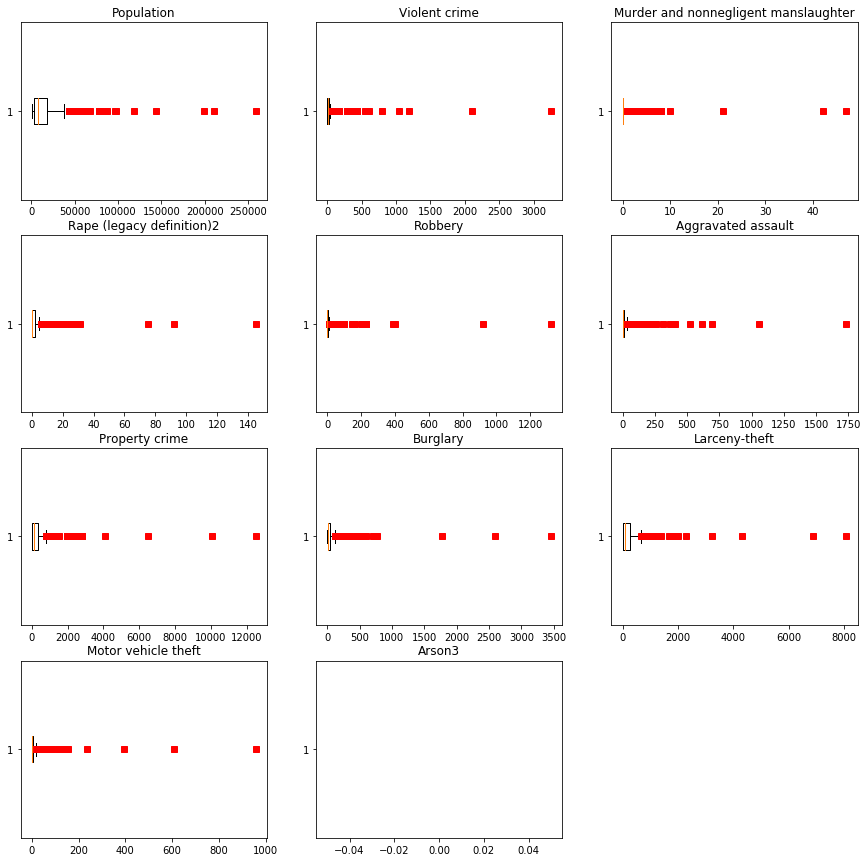

In [123]:
check=['Population','Violent crime','Murder and nonnegligent manslaughter','Rape (legacy definition)2','Robbery','Aggravated assault','Property crime',
      'Burglary','Larceny-theft','Motor vehicle theft','Arson3']
plt.figure(figsize=(15, 15))
counter=1

for i in check:
    plt.subplot(4,3,counter)
    plt.boxplot(test[i], 0, 'rs', 0)
    plt.title(i)
    counter+=1
plt.show()

In [124]:
# check the outlier
df = df.sort_values(by='Population', ascending=False)
df.head(5)

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny-theft,Motor vehicle theft,Arson3
216,New York,8396126,52384,335,1112,19170,31767,141971,16606,117931,7434,NaN
35,Buffalo,258789,3249,47,145,1322,1735,12491,3458,8076,957,NaN
272,Rochester,210562,2107,42,92,918,1055,10051,2587,6855,609,132.0
346,Yonkers,199134,1036,6,25,390,615,2368,470,1662,236,10.0
310,Syracuse,143834,1192,21,75,400,696,6473,1781,4298,394,57.0


In [125]:
# new york is a outlier 
df = df[df['City'] != 'New York']

In [126]:
df = df.sort_values(by='Population', ascending=False)
df.head(5)

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny-theft,Motor vehicle theft,Arson3
35,Buffalo,258789,3249,47,145,1322,1735,12491,3458,8076,957,NaN
272,Rochester,210562,2107,42,92,918,1055,10051,2587,6855,609,132.0
346,Yonkers,199134,1036,6,25,390,615,2368,470,1662,236,10.0
310,Syracuse,143834,1192,21,75,400,696,6473,1781,4298,394,57.0
7,Amherst Town,118296,107,1,7,31,68,2118,204,1882,32,3.0


/home/ll/anaconda3/lib/python3.5/site-packages/numpy/lib/function_base.py:4274: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/home/ll/anaconda3/lib/python3.5/site-packages/matplotlib/cbook/__init__.py:1857: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = np.compress(x <= hival, x)
/home/ll/anaconda3/lib/python3.5/site-packages/matplotlib/cbook/__init__.py:1864: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = np.compress(x >= loval, x)
/home/ll/anaconda3/lib/python3.5/site-packages/matplotlib/cbook/__init__.py:1872: RuntimeWarning: invalid value encountered in less
  np.compress(x < stats['whislo'], x),
/home/ll/anaconda3/lib/python3.5/site-packages/matplotlib/cbook/__init__.py:1873: RuntimeWarning: invalid value encountered in greater
  np.compress(x > stats['whishi'], x)


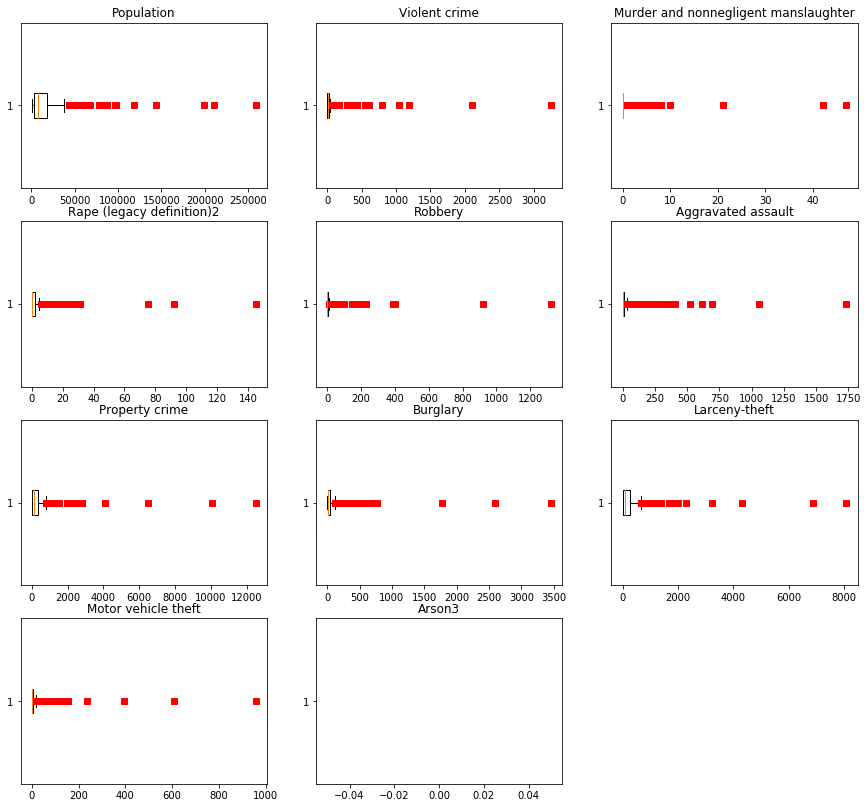

In [127]:
test=df
test = test.iloc[:,1:]

plt.figure(figsize=(15, 14))
counter=1

for i in check:
    plt.subplot(4,3,counter)
    plt.boxplot(test[i], 0, 'rs', 0)
    plt.title(i)
    counter+=1
plt.show()

In [128]:
df=test

In [129]:
df['Arson3'].unique()
#df.groupby('Arson3').count()

array([  nan,  132.,   10.,   57.,    3.,    2.,    1.,    5.,   22.,
          6.,    0.,    8.,    4.,   15.])

In [130]:
# convert Murder , Robbery to float
df['Robbery']=df['Robbery'] *1.
df['Murder and nonnegligent manslaughter']=df['Murder and nonnegligent manslaughter'] *1.

In [131]:
#check data type
df.dtypes

Population                                int64
Violent crime                             int64
Murder and nonnegligent manslaughter    float64
Rape (legacy definition)2                 int64
Robbery                                 float64
Aggravated assault                        int64
Property crime                            int64
Burglary                                  int64
Larceny-theft                             int64
Motor vehicle theft                       int64
Arson3                                  float64
dtype: object

In [132]:
#Assign feature
#     Propertycrime=α+Population+Population2+Murder+Robbery

feature = pd.DataFrame()
feature['Murder and nonnegligent manslaughter'] =df['Murder and nonnegligent manslaughter']
feature['Population']= df['Population']
feature['Robbery']= df['Robbery']
feature['Population2']= np.power(df['Population'],2)

target = df['Property crime']

In [133]:
# Run simple regression
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(feature, target)
print('\nValues Coefficients: \n', regr.coef_)
print('\nValues Intercept: \n', regr.intercept_)
print('\nValues R-squared:')
print(regr.score(feature, target))


Values Coefficients: 
 [  1.02643383e+02   2.05519792e-02   5.13001360e+00  -7.19468320e-08]

Values Intercept: 
 -25.0398582081

Values R-squared:
0.939283140822


In [134]:
# Run multiple regression
import statsmodels.formula.api as smf
linear_formula = "'Property crime' ~ 'Robbery'+'Murder and nonnegligent manslaughter'+'Population'+'Population2'"

lm = smf.ols(formula=linear_formula, data=df).fit()

#linear_formula = "Property crime ~Robbery+Murder and nonnegligent manslaughter+Population+Population2"

print ('Coefficient:  ')
print (lm.params)

print ('\nP-Value:  ')
print (lm.pvalues)

print ('\nR-Squared:   ')
print (lm.rsquared)

print ('\nConfidence Intervals:   ')
print (lm.conf_int())

PatsyError: Number of rows mismatch between data argument and 'Property crime' (347 versus 1)
    'Property crime' ~ 'Robbery'+'Murder and nonnegligent manslaughter'+'Population'+'Population2'
    ^^^^^^^^^^^^^^^^

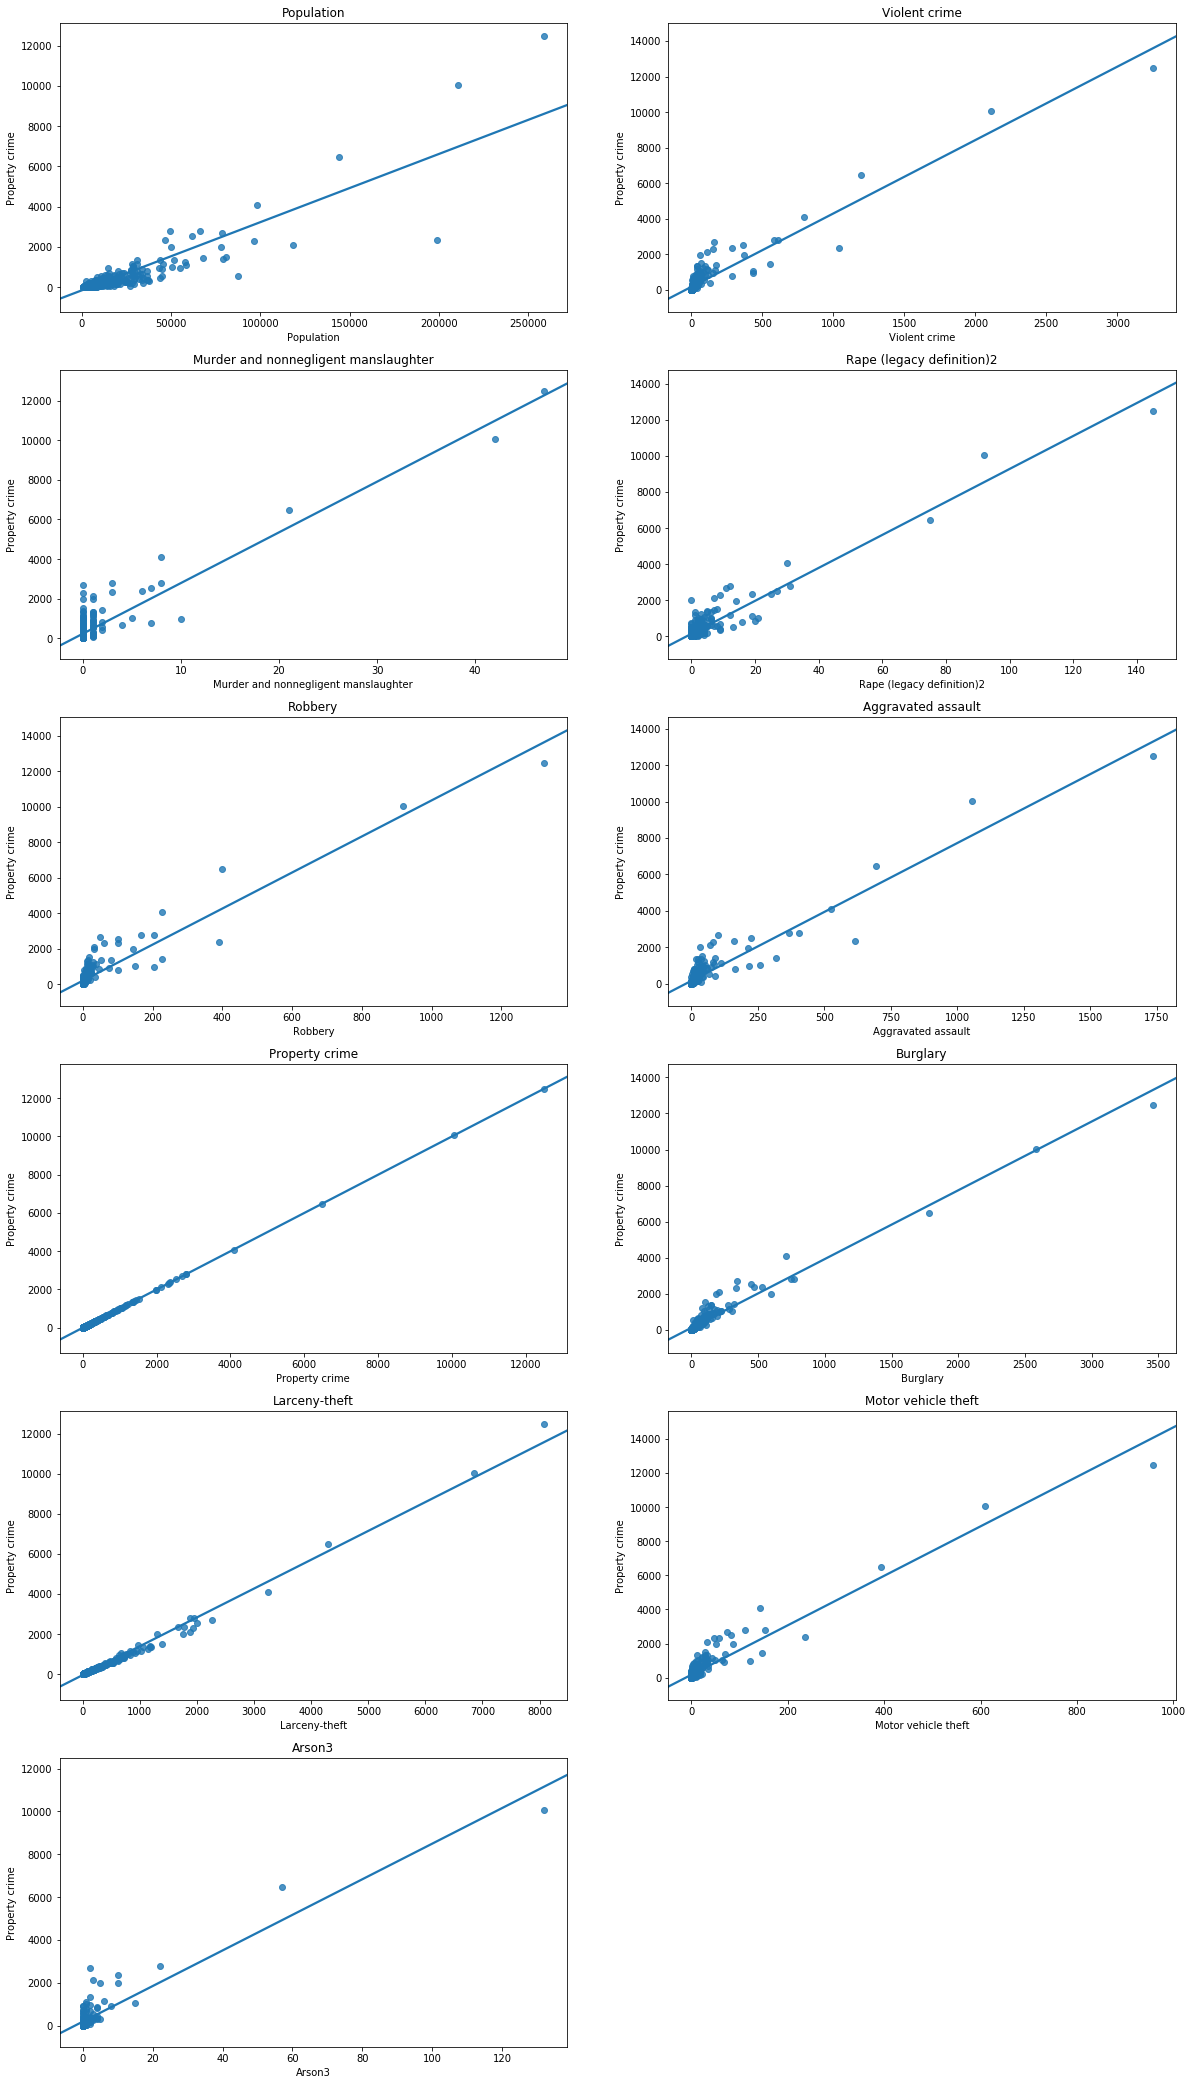

In [135]:
# Check whether linear relationship
#feature2 =df.drop(['Property crime'],axis=1)
feature2 = df

plt.figure(figsize=(20, 50))
counter=1

for i in check:
    plt.subplot(8,2,counter)
    sns.regplot(feature2[i], feature2['Property crime'], ci = False)
    plt.title(i)
    counter+=1
plt.show()


### drop 3 more outliers from population



ValueError: max must be larger than min in range parameter.

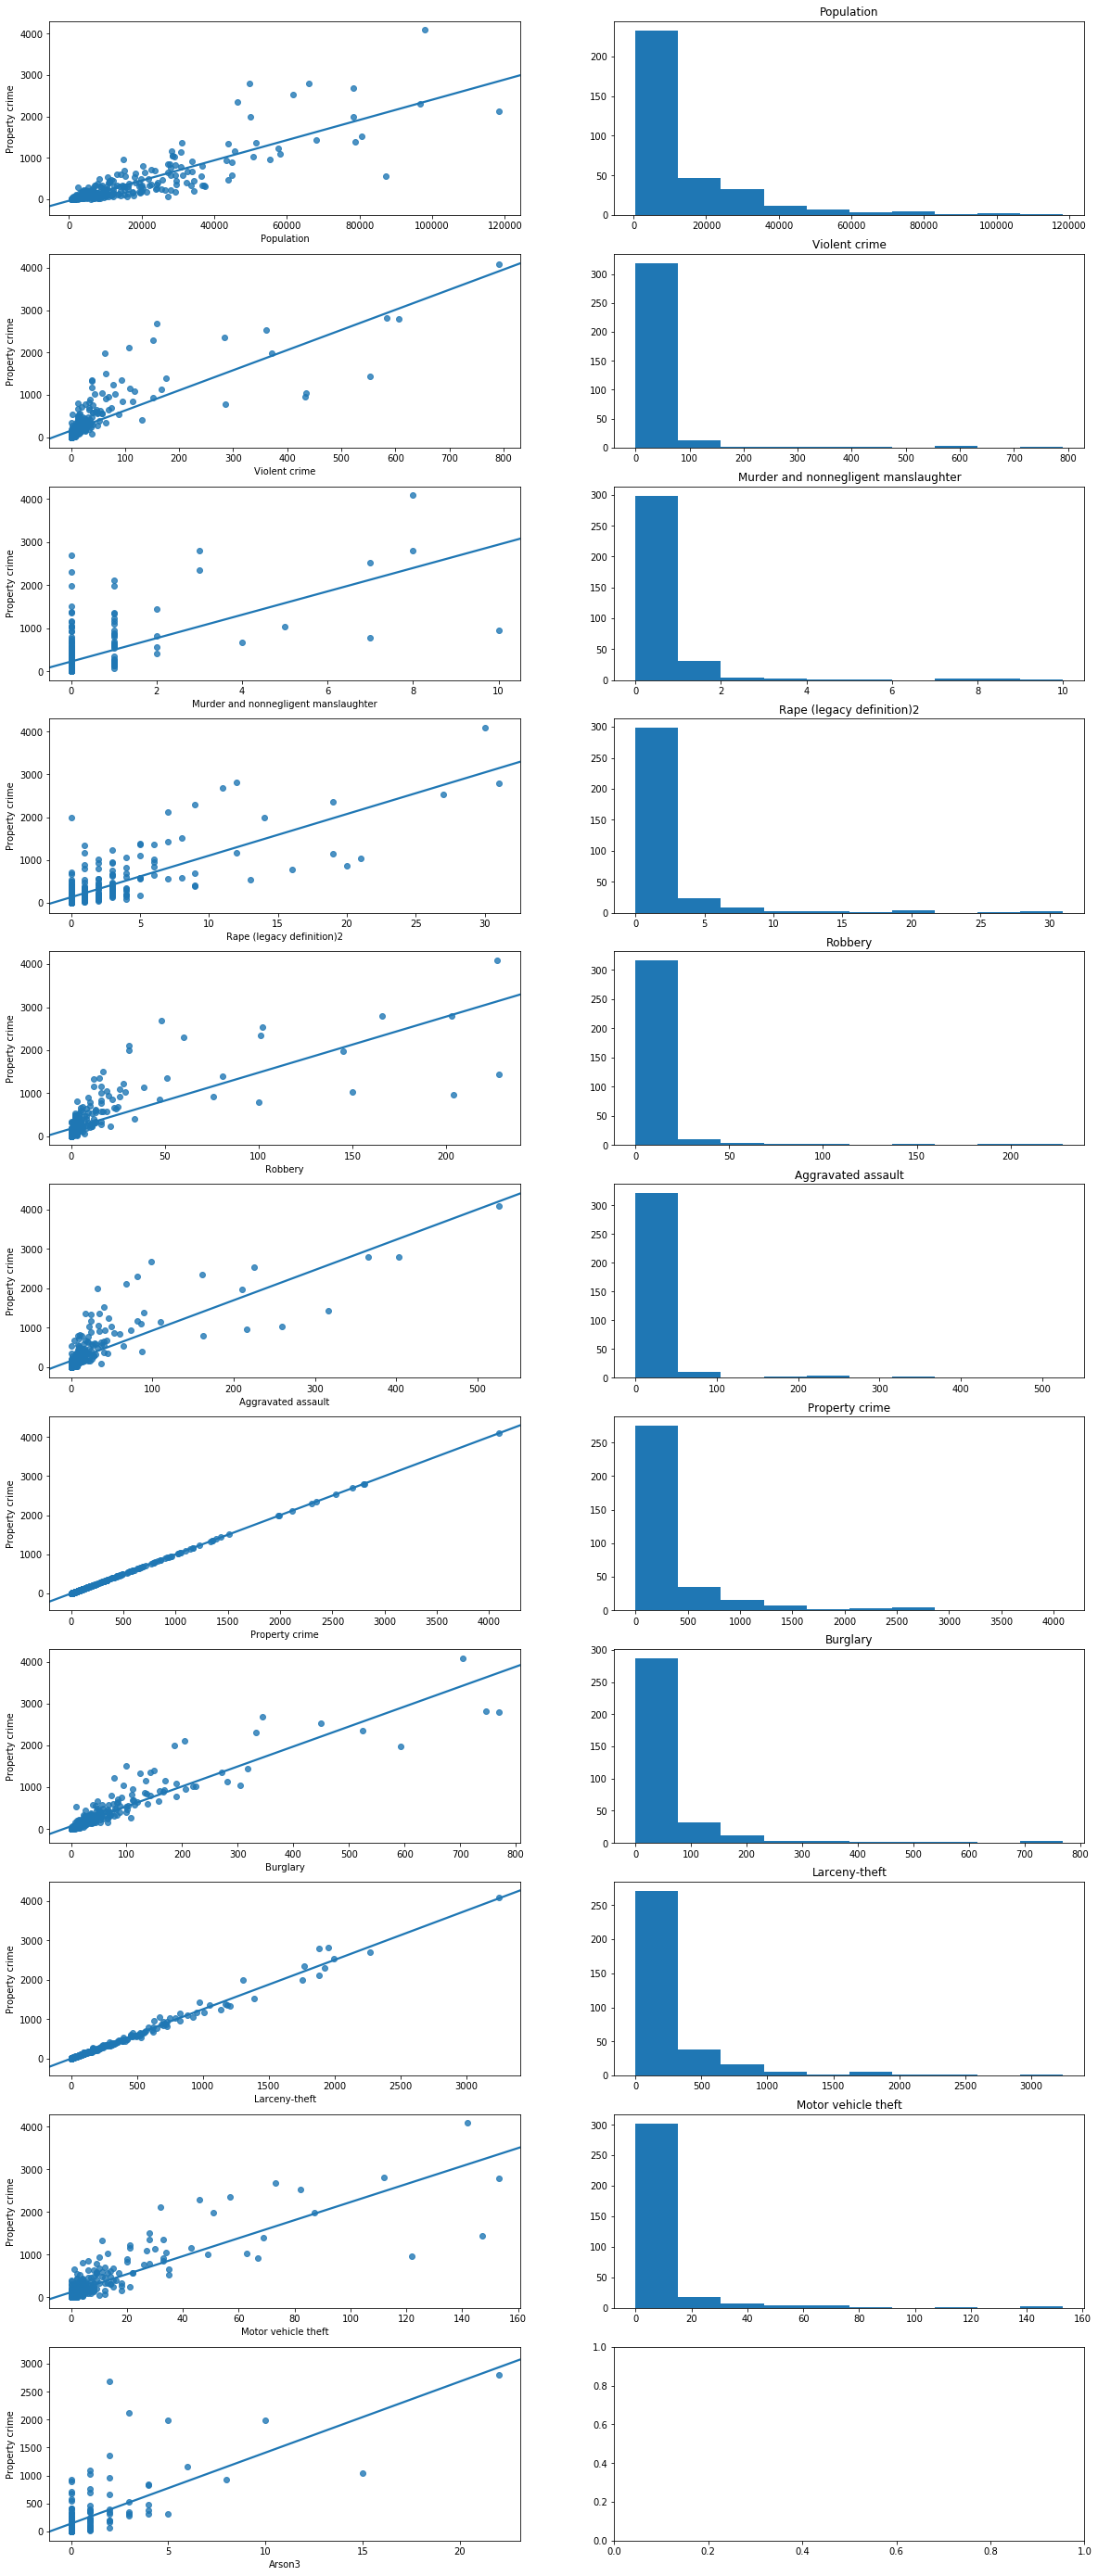

In [137]:
feature2 = df[df['Population']<=130000]
plt.figure(figsize=(20, 50))
counter=1
lenth=len(check)
for i in check:
    plt.subplot(lenth,2,counter)
    sns.regplot(feature2[i], feature2['Property crime'], ci = False)
    counter +=1
    plt.subplot(lenth,2,counter)
    plt.hist(feature2[i])
    plt.title(i)
    counter+=1
plt.show()

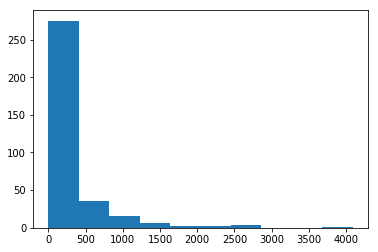

In [107]:
# Check target distribution
plt.hist(feature2['Property crime'])
plt.show()

/home/ll/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


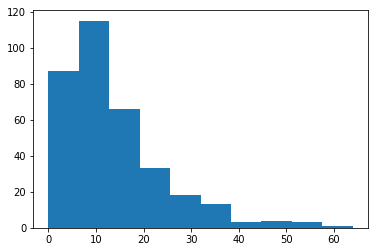

In [138]:
feature2['Property crime'] = np.sqrt(feature2['Property crime'])
plt.hist(feature2['Property crime'])
plt.show()

In [140]:
from sklearn.preprocessing import MinMaxScaler
check2=['Population','Violent crime','Murder and nonnegligent manslaughter','Rape (legacy definition)2','Robbery','Aggravated assault','Property crime',
      'Burglary','Larceny-theft','Motor vehicle theft']
scaler = MinMaxScaler()
feature2[check2] = scaler.fit_transform(feature2[check2])


/home/ll/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/ll/anaconda3/lib/python3.5/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [142]:
feature2.head(5)

,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny-theft,Motor vehicle theft,Arson3
7,1.000000,0.135272,0.1,0.225806,0.135965,0.129278,0.719617,0.265280,0.580327,0.209150,3.0
3,0.827290,1.000000,0.8,0.967742,0.995614,1.000000,1.000000,0.916775,1.000000,0.928105,NaN
126,0.816345,0.190898,0.0,0.290323,0.263158,0.155894,0.750387,0.431730,0.593586,0.300654,NaN
267,0.735994,0.072061,0.2,0.161290,0.039474,0.077947,0.372332,0.114434,0.143694,0.084967,NaN
57,0.680810,0.082174,0.0,0.258065,0.074561,0.076046,0.608618,0.128739,0.427999,0.183007,NaN


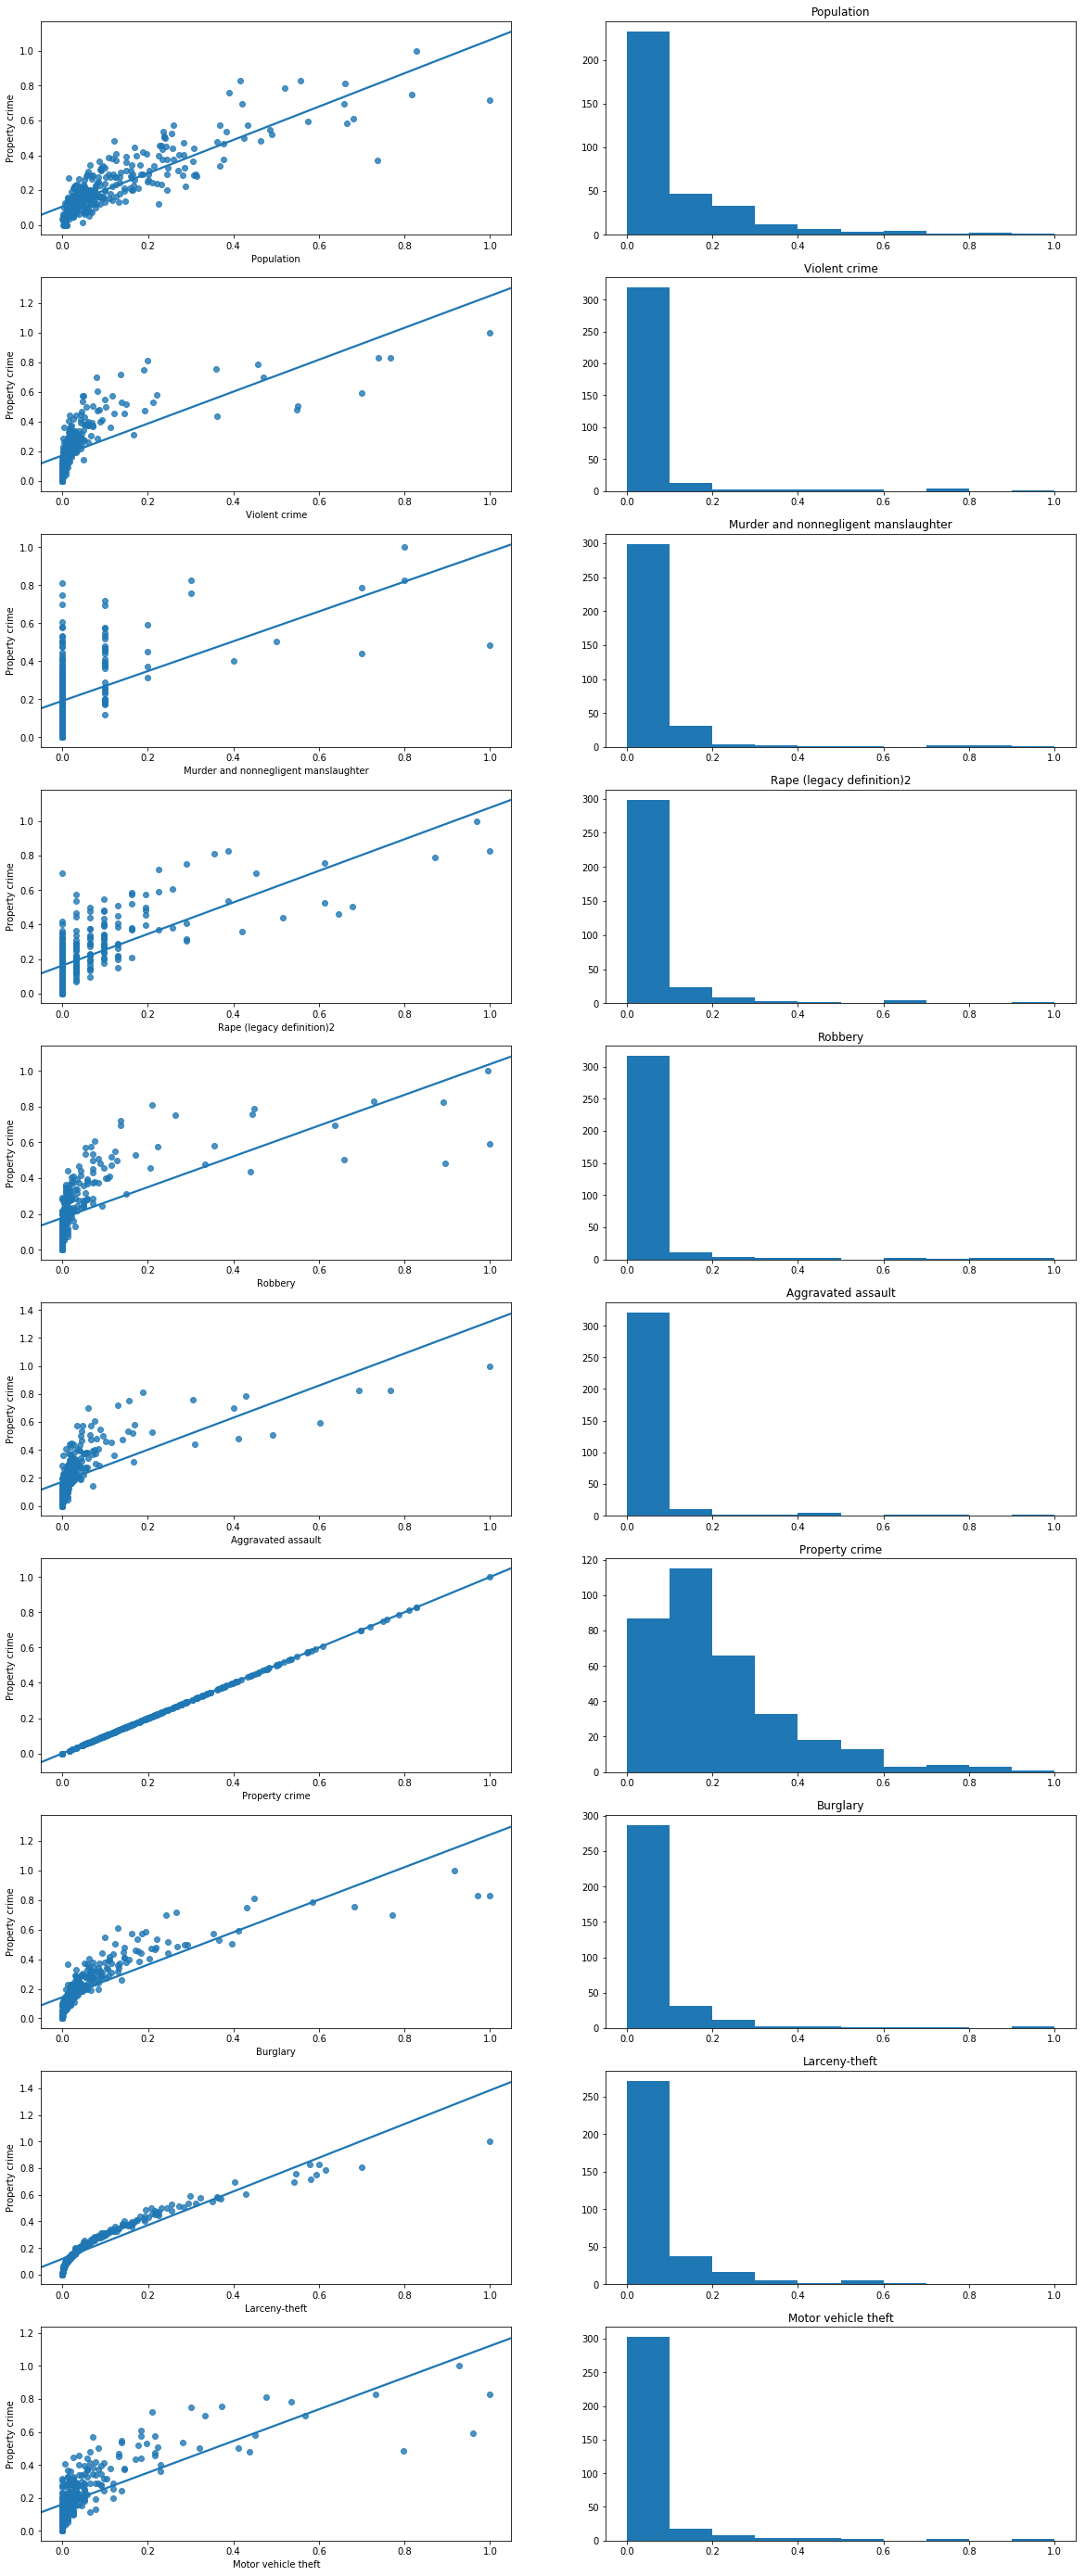

In [141]:
plt.figure(figsize=(20, 50))
counter=1
lenth=len(check2)
for i in check2:
    plt.subplot(lenth,2,counter)
    sns.regplot(feature2[i], feature2['Property crime'], ci = False)
    counter +=1
    plt.subplot(lenth,2,counter)
    plt.hist(feature2[i])
    plt.title(i)
    counter+=1
plt.show()

In [153]:
regr = linear_model.LinearRegression()
#target = feature2['Property crime'].values.reshape(-1, 1)
feature2 = feature2[['Population','Violent crime','Murder and nonnegligent manslaughter','Rape (legacy definition)2','Robbery','Aggravated assault',
      'Burglary','Larceny-theft','Motor vehicle theft']]

regr.fit(feature2, target)

print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(feature2,target))


Coefficients: 
 [ 0.22197978 -0.20768306 -0.00680246  0.1416918   0.27321362 -0.43896279
  0.30640544  0.87478953 -0.02743365]

Intercept: 
 0.109536737795

R-squared:
0.901220605259


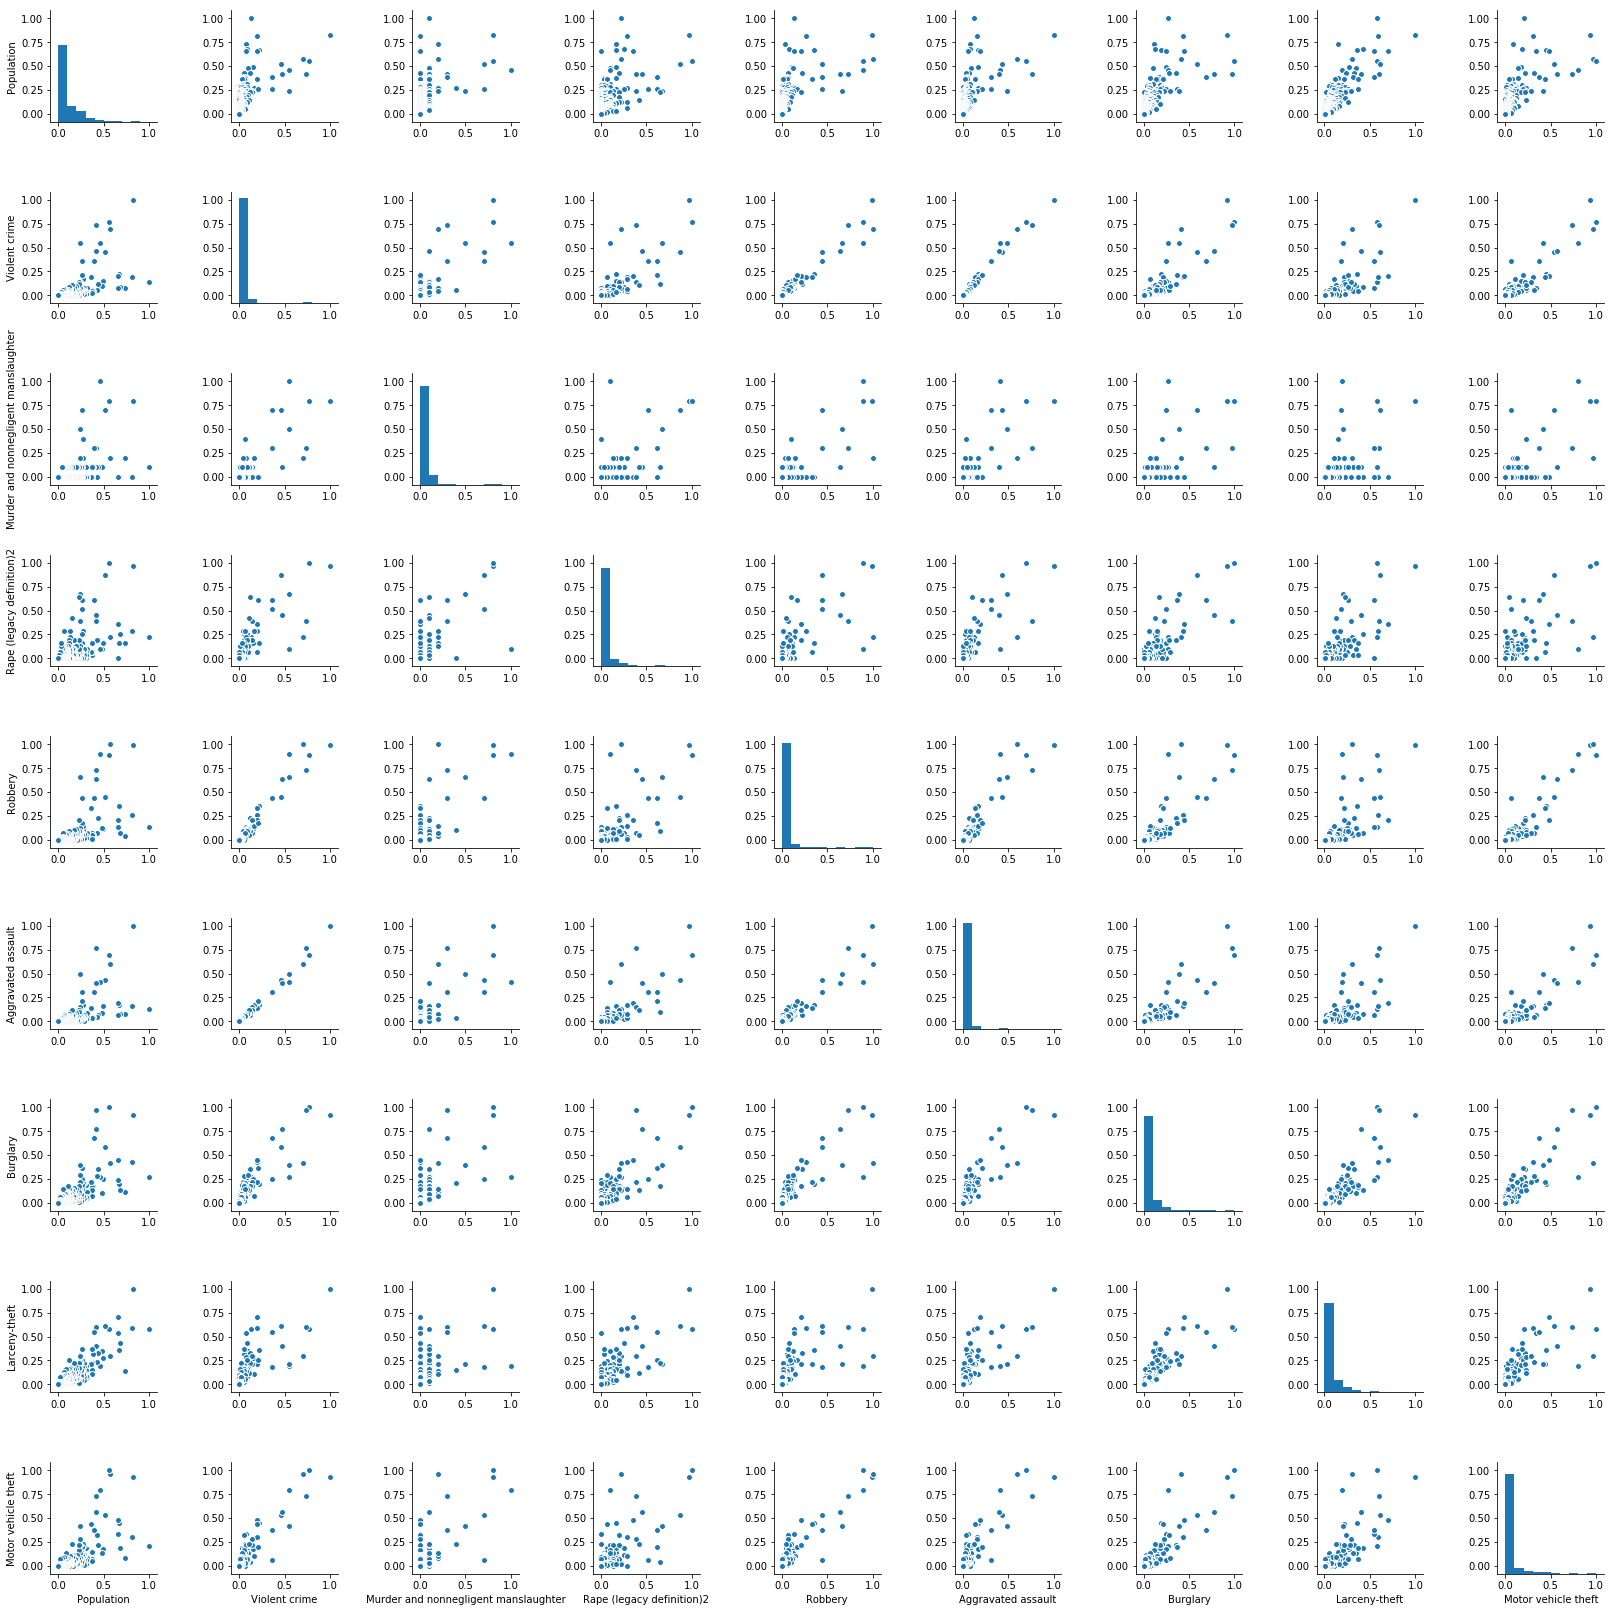

In [155]:
_ = sns.pairplot(feature2)